# 1. Preparing data pipeline
This is the first tutorial about how to use `molpot`, focus on setup your pipeline to load and process data.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import molpot as mpot

In [14]:
qm9_dataset = mpot.dataset.QM9(
        save_dir="qm9", batch_size=3, total=1000, device="cpu"
    )
dp = qm9_dataset.prepare()

train, valid = dp.random_split(
    weights={"train": 0.8, "valid": 0.2}, seed=42
)

train_dataloader = mpot.create_dataloader(train)
valid_dataloader = mpot.create_dataloader(valid)

[autoreload of molpot.pipline.process failed: Traceback (most recent call last):
  File "/home/jicli594/miniconda3/envs/work/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "/home/jicli594/miniconda3/envs/work/lib/python3.11/site-packages/IPython/extensions/autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "/home/jicli594/miniconda3/envs/work/lib/python3.11/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_removed
  File "/home/jicli594/work/molcrafts/molpot/src/molpot/pipline/process.py", line 20, in <module>
    @functional_datapipe("normalize")
     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/jicli594/miniconda3/

In [8]:
print('Number of reference calculations:', len(qm9_dataset))
print('Number of train data:', len(train))
print('Number of validation data:', len(valid))
print('Available properties:')

for p in qm9_dataset.labels:
    print('-', p)

Number of reference calculations: 1000
Number of train data: 800
Number of validation data: 200
Available properties:
- A
- B
- C
- mu
- alpha
- homo
- lumo
- gap
- r2
- zpve
- U0
- U
- H
- G
- Cv


In [11]:
for batch in train_dataloader:
    for k, v in batch.items():
        print(f"- {k} {v.shape}")
    break

- _n_atoms torch.Size([3])
- _idx torch.Size([3])
- _A torch.Size([3])
- _B torch.Size([3])
- _C torch.Size([3])
- _mu torch.Size([3])
- _alpha torch.Size([3])
- _homo torch.Size([3])
- _lumo torch.Size([3])
- _gap torch.Size([3])
- _r2 torch.Size([3])
- _zpve torch.Size([3])
- _U0 torch.Size([3])
- _U torch.Size([3])
- _H torch.Size([3])
- _G torch.Size([3])
- _Cv torch.Size([3])
- _xyz torch.Size([12, 3])
- _atomic_numbers torch.Size([12])
- _cell torch.Size([9, 3])
- _pbc torch.Size([9])
- _idx_m torch.Size([12])


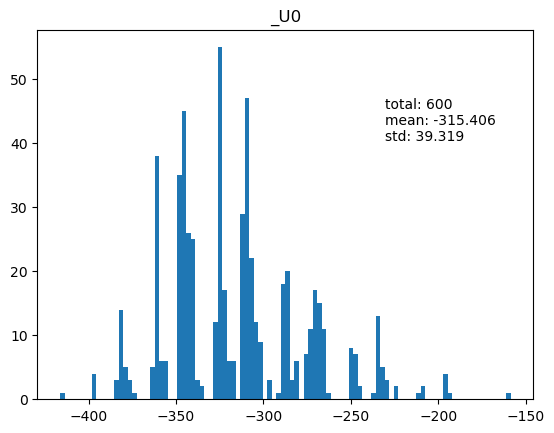

In [13]:
dinspector = mpot.DataInspector(valid_dataloader)
dinspector.plot_dist(qm9_dataset.alias.U0)